In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import pandas as pd
from pandas import DataFrame
from pandas import Series
from netCDF4 import Dataset
from netCDF4 import num2date
from netCDF4 import date2num
import datetime
import os
import sys
import os.path
import glob

In [2]:
# Reading in model output files, from three different applications, fabm0d,
# gotm1d and gotmlake
output_dir= os.path.normpath(os.getcwd() + os.sep + os.pardir+"/output")
fabm0d=[];gotm1d=[];gotmlake=[]
for f_0d in glob.glob("*fabm0d*.nc"):
    fabm0d.append(f_0d)
# gotm1d files
for f_1d in glob.glob("*gotm1d*.nc"):
    gotm1d.append(f_1d)
# gotm-lake files
for f_lake in glob.glob("*gotmlake*.nc"):
    gotmlake.append(f_lake)

In [3]:
# Set ploting time intervals(keep matplotlib datetime format)
# Since 3 applications has the same time intervals, so use anyone of them is fine
# Set ploting time intervals(keep matplotlib datetime format)
path=os.path.join(output_dir, fabm0d[0])
# convert NetCDF data to Dataset, to read time
time_nc=Dataset(path, mode='r')
time        = time_nc.variables['time']
units       = time_nc.variables['time'].units
valid_times = num2date(time[:], units=units).tolist()
# Set the start and stop point for ploting interval
start=valid_times.index(datetime.datetime(2015, 1, 1))
stop=valid_times.index(datetime.datetime(2016, 1, 1))
# Time for extracting data
time=valid_times[start:stop]
# ploting x axis
dt=datetime.date
# Setting period, and model output intervals is 1day
time_t=mdates.drange(dt(2015,1,1), dt(2016,1,1), datetime.timedelta(days=1))

In [4]:
# Read in gotm1d data, get the vertical avarage value, and store in nc Dataset form
# creat dict for store output of wanted fabm0d data
df_fabm0d={};df_comp_0d={}
for f_0d in fabm0d:
    path=os.path.join(output_dir, f_0d)
    fabm0d_nc=Dataset(path, mode='r')
    if f_0d=='pclake-fabm0d-2m.nc':
        d=2.0
    elif f_0d=='pclake-fabm0d-5m.nc':
        d=5.0
    elif f_0d=='pclake-fabm0d-10m.nc':
        d=10.0
    elif f_0d=='pclake-fabm0d-20m.nc':
        d=20.0
# create empty lists for storging extracted and treated variables
    temperature=fabm0d_nc.variables['temp'][start:stop,0,0]
    PAR=fabm0d_nc.variables['phytoplankton_water_phypar'][start:stop,0,0]
    Oxygen=fabm0d_nc.variables['abiotic_water_sO2W'][start:stop,0,0]
    TP=fabm0d_nc.variables['pclake_totP_calculator_result'][start:stop,0,0]
    TN=fabm0d_nc.variables['pclake_totN_calculator_result'][start:stop,0,0]
    Zoo=fabm0d_nc.variables['zooplankton_sDZoo'][start:stop,0,0]
    Fish=fabm0d_nc.variables['fish_sDFiAd'][start:stop,0,0]+ \
    fabm0d_nc.variables['fish_sDFiJv'][start:stop,0,0]
    Veg=fabm0d_nc.variables['macrophytes_sDVeg'][start:stop,0,0]
    Ben=fabm0d_nc.variables['zoobenthos_sDBent'][start:stop,0,0]
#   Variables for TN, TP and phytoplankton compositions
    NH4=fabm0d_nc.variables['abiotic_water_sNH4W'][start:stop,0,0]
    NO3=fabm0d_nc.variables['abiotic_water_sNO3W'][start:stop,0,0]
    NDOM=fabm0d_nc.variables['abiotic_water_sNDOMW'][start:stop,0,0]
    NPOM=fabm0d_nc.variables['abiotic_water_sNPOMW'][start:stop,0,0] 
    NDet=np.add(NDOM,NPOM)
    PO4=fabm0d_nc.variables['abiotic_water_sPO4W'][start:stop,0,0]
    PAIM=fabm0d_nc.variables['abiotic_water_sPAIMW'][start:stop,0,0]
    PDOM=fabm0d_nc.variables['abiotic_water_sPDOMW'][start:stop,0,0]
    PPOM=fabm0d_nc.variables['abiotic_water_sPPOMW'][start:stop,0,0]
    PDet=np.add(PDOM,PPOM)
    NBlue=fabm0d_nc.variables['phytoplankton_water_sNBlueW'][start:stop,0,0]
    NGren=fabm0d_nc.variables['phytoplankton_water_sNGrenW'][start:stop,0,0]
    NDiat=fabm0d_nc.variables['phytoplankton_water_sNDiatW'][start:stop,0,0]
    NPhyt=np.add(np.add(NBlue,NGren),NDiat)
    PBlue=fabm0d_nc.variables['phytoplankton_water_sPBlueW'][start:stop,0,0]
    PGren=fabm0d_nc.variables['phytoplankton_water_sPGrenW'][start:stop,0,0]
    PDiat=fabm0d_nc.variables['phytoplankton_water_sPDiatW'][start:stop,0,0]
    PPhyt=np.add(np.add(PBlue,PGren),PDiat)
    DBlue=fabm0d_nc.variables['phytoplankton_water_sDBlueW'][start:stop,0,0]
    DGren=fabm0d_nc.variables['phytoplankton_water_sDGrenW'][start:stop,0,0]
    DDiat=fabm0d_nc.variables['phytoplankton_water_sDDiatW'][start:stop,0,0]
    DPhyt=np.add(np.add(DBlue,DGren),DDiat)
#   sediment nutrients
    PO4S=fabm0d_nc.variables['abiotic_sediment_sPO4S'][start:stop,0,0];
    NO3S=fabm0d_nc.variables['abiotic_sediment_sNO3S'][start:stop,0,0];
# put list into pandas dataframe format
    temp=DataFrame(temperature,index=time,columns=['temp'])
    PAR=DataFrame(PAR,index=time,columns=['PAR'])
    O2=DataFrame(Oxygen,index=time,columns=['O2'])
    totP=DataFrame(TP,index=time,columns=['totP'])
    totN=DataFrame(TN,index=time,columns=['totN'])
    aDPhytW=DataFrame(DPhyt,index=time,columns=['aDPhytW'])
    sDZoo=DataFrame(Zoo,index=time,columns=['sDZoo'])
    aDFish=DataFrame(Fish,index=time,columns=['aDFish'])
    sDVeg=DataFrame(Veg,index=time,columns=['sDVeg'])
    sDBent=DataFrame(Ben,index=time,columns=['sDBent'])
## TN, TP and Phytoplankton composition variables
    sNH4W=DataFrame(NH4,index=time,columns=['sNH4W'])
    sNO3W=DataFrame(NO3,index=time,columns=['sNO3W'])
    sNDetW=DataFrame(NDet,index=time,columns=['sNDetW'])
    sPO4W=DataFrame(PO4,index=time,columns=['sPO4W'])
    sPAIMW=DataFrame(PAIM,index=time,columns=['sPAIMW'])
    sPDetW=DataFrame(PDet,index=time,columns=['sPDetW'])
    aNPhytW=DataFrame(NPhyt,index=time,columns=['aNPhytW'])
    aPPhytW=DataFrame(PPhyt,index=time,columns=['aPPhytW'])
    sDBlueW=DataFrame(DBlue,index=time,columns=['sDBlueW'])
    sDGrenW=DataFrame(DGren,index=time,columns=['sDGrenW'])
    sDDiatW=DataFrame(DDiat,index=time,columns=['sDDiatW'])
## extra for NDOM, NPOM, PDOM, PPOM variables
    sNDOMW=DataFrame(NDOM,index=time,columns=['sNDOMW'])
    sNPOMW=DataFrame(NPOM,index=time,columns=['sNPOMW'])
    sPDOMW=DataFrame(PDOM,index=time,columns=['sPDOMW'])
    sPPOMW=DataFrame(PPOM,index=time,columns=['sPPOMW'])
#   sediment nutrient variables
    sPO4S=DataFrame(PO4S,index=time,columns=['sPO4S']);
    sNO3S=DataFrame(NO3S,index=time,columns=['sNO3S']);
    
# put data into dict for future usage
    df_fabm0d[f_0d]=pd.concat([temp,PAR,O2,totP,totN,aDPhytW,sDZoo,aDFish,sDVeg,sDBent,sNH4W,sNO3W,sPO4W,
                              sDBlueW,sDGrenW,sDDiatW,sPO4S,sNO3S],axis=1)
# composition data dict
    df_TN=pd.concat([sNH4W,sNO3W,sNDOMW,sNPOMW,aNPhytW],axis=1)
    df_TP=pd.concat([sPO4W,sPAIMW,sPDOMW,sPPOMW,aPPhytW],axis=1)
    df_Phyt=pd.concat([sDBlueW,sDGrenW,sDDiatW],axis=1)    
    df_comp_0d[f_0d]=pd.concat([df_TN,df_TP,df_Phyt],axis=1,keys=['TN','TP','Phyt'])

In [5]:
# Read in gotm1d data, get the vertical avarage value, and store in nc Dataset form
# creat dict for store output of wanted GOTM1D data
df_gotm1d={};df_comp_1d={}
# Loop over gotm1d files and get the netcdf dataa
for f_1d in gotm1d:
    path=os.path.join(output_dir, f_1d)
    gotm1d_nc=Dataset(path, mode='r')
    # Get the f_lvl for different depth
    lvl=len(gotm1d_nc.variables['temp'][0])
# get the depth for fish data
#    if lvl==5:
#        d=2.0
#    elif lvl==13:
#        d=5.0
#    elif lvl==25:
#        d=10.0
#    elif lvl==50:
#        d=20.0
# create empty lists for storging extracted and treated variables
    temperature=[];PAR=[];Oxygen=[];TP=[];TN=[]
    Zoo=[];Fish=[];Veg=[];Ben=[]
# variables for composition, TN, TP and phytoplankton
    NH4=[];NO3=[];NDOM=[];NPOM=[];PO4=[];PAIM=[];PDOM=[];PPOM=[];
    NBlue=[];NGren=[];NDiat=[];PBlue=[];PGren=[]
    PDiat=[];DBlue=[];DGren=[];DDiat=[];PO4S = [];NO3S=[];
# variables for composition
    
# loop over time and put the variable in lists
    i=start
    for t in time:
        temperature.append(np.mean(gotm1d_nc.variables['temp'][i,:,0,0]))
        Oxygen.append(np.mean(gotm1d_nc.variables['abiotic_water_sO2W'][i,:,0,0]))
        TP.append(np.mean(gotm1d_nc.variables['pclake_totP_calculator_result'][i,:,0,0]))
        TN.append(np.mean(gotm1d_nc.variables['pclake_totN_calculator_result'][i,:,0,0]))
        Zoo.append(np.mean(gotm1d_nc.variables['zooplankton_sDZoo'][i,:,0,0]))
        Fish.append(gotm1d_nc.variables['fish_sDFiAd'][i,0,0]+
                    gotm1d_nc.variables['fish_sDFiJv'][i,0,0])
        PAR.append(gotm1d_nc.variables['phytoplankton_water_phypar'][i,-1,0,0])
        Veg.append(gotm1d_nc.variables['macrophytes_sDVeg'][i,0,0])
        Ben.append(gotm1d_nc.variables['zoobenthos_sDBent'][i,0,0])
#   sediment nutrients
        PO4S.append(gotm1d_nc.variables['abiotic_sediment_sPO4S'][i,0,0]);
        NO3S.append(gotm1d_nc.variables['abiotic_sediment_sNO3S'][i,0,0]);
#  variables for composition TN,TP and Phytoplankton
        NH4.append(np.mean(gotm1d_nc.variables['abiotic_water_sNH4W'][i,:,0,0]))
        NO3.append(np.mean(gotm1d_nc.variables['abiotic_water_sNO3W'][i,:,0,0]))
        NDOM.append(np.mean(gotm1d_nc.variables['abiotic_water_sNDOMW'][i,:,0,0]))
        NPOM.append(np.mean(gotm1d_nc.variables['abiotic_water_sNPOMW'][i,:,0,0]))
        PO4.append(np.mean(gotm1d_nc.variables['abiotic_water_sPO4W'][i,:,0,0]))
        PAIM.append(np.mean(gotm1d_nc.variables['abiotic_water_sPAIMW'][i,:,0,0]))
        PDOM.append(np.mean(gotm1d_nc.variables['abiotic_water_sPDOMW'][i,:,0,0]))
        PPOM.append(np.mean(gotm1d_nc.variables['abiotic_water_sPPOMW'][i,:,0,0]))
        NBlue.append(np.mean(gotm1d_nc.variables['phytoplankton_water_sNBlueW'][i,:,0,0]))
        NGren.append(np.mean(gotm1d_nc.variables['phytoplankton_water_sNGrenW'][i,:,0,0]))
        NDiat.append(np.mean(gotm1d_nc.variables['phytoplankton_water_sNDiatW'][i,:,0,0]))
        PBlue.append(np.mean(gotm1d_nc.variables['phytoplankton_water_sPBlueW'][i,:,0,0]))
        PGren.append(np.mean(gotm1d_nc.variables['phytoplankton_water_sPGrenW'][i,:,0,0]))
        PDiat.append(np.mean(gotm1d_nc.variables['phytoplankton_water_sPDiatW'][i,:,0,0]))
        DBlue.append(np.mean(gotm1d_nc.variables['phytoplankton_water_sDBlueW'][i,:,0,0]))
        DGren.append(np.mean(gotm1d_nc.variables['phytoplankton_water_sDGrenW'][i,:,0,0]))
        DDiat.append(np.mean(gotm1d_nc.variables['phytoplankton_water_sDDiatW'][i,:,0,0]))
        i=i+1
    DPhyt=np.add(np.add(DBlue,DGren),DDiat)
    NPhyt=np.add(np.add(NBlue,NGren),NDiat)
    PPhyt=np.add(np.add(PBlue,PGren),PDiat)
    NDet =np.add(NDOM,NPOM)
    PDet =np.add(PDOM,PPOM)
    
# put list into pandas dataframe format
    temp=DataFrame(temperature,index=time,columns=['temp'],)
    PAR=DataFrame(PAR,index=time,columns=['PAR'])
    O2=DataFrame(Oxygen,index=time,columns=['O2'])
    totP=DataFrame(TP,index=time,columns=['totP'])
    totN=DataFrame(TN,index=time,columns=['totN'])
    aDPhytW=DataFrame(DPhyt,index=time,columns=['aDPhytW'])
    sDZoo=DataFrame(Zoo,index=time,columns=['sDZoo'])
    aDFish=DataFrame(Fish,index=time,columns=['aDFish'])
    sDVeg=DataFrame(Veg,index=time,columns=['sDVeg'])
    sDBent=DataFrame(Ben,index=time,columns=['sDBent'])
## TN, TP and Phytoplankton composition variables
    sNH4W=DataFrame(NH4,index=time,columns=['sNH4W'])
    sNO3W=DataFrame(NO3,index=time,columns=['sNO3W'])
    sNDetW=DataFrame(NDet,index=time,columns=['sNDetW'])
    sPO4W=DataFrame(PO4,index=time,columns=['sPO4W'])
    sPAIMW=DataFrame(PAIM,index=time,columns=['sPAIMW'])
    sPDetW=DataFrame(PDet,index=time,columns=['sPDetW'])
    aNPhytW=DataFrame(NPhyt,index=time,columns=['aNPhytW'])
    aPPhytW=DataFrame(PPhyt,index=time,columns=['aPPhytW'])
    sDBlueW=DataFrame(DBlue,index=time,columns=['sDBlueW'])
    sDGrenW=DataFrame(DGren,index=time,columns=['sDGrenW'])
    sDDiatW=DataFrame(DDiat,index=time,columns=['sDDiatW'])
## extra for NDOM, NPOM, PDOM, PPOM variables
    sNDOMW=DataFrame(NDOM,index=time,columns=['sNDOMW'])
    sNPOMW=DataFrame(NPOM,index=time,columns=['sNPOMW'])
    sPDOMW=DataFrame(PDOM,index=time,columns=['sPDOMW'])
    sPPOMW=DataFrame(PPOM,index=time,columns=['sPPOMW'])
#   sediment nutrients
    sPO4S = DataFrame(PO4S,index=time,columns=['sPO4S']);
    sNO3S = DataFrame(NO3S,index=time,columns=['sNO3S']);
    
# put data into dict for future usage
    df_gotm1d[f_1d]=pd.concat([temp,PAR,O2,totP,totN,aDPhytW,sDZoo,aDFish,sDVeg,sDBent,sNH4W,sNO3W,sPO4W,
                              sDBlueW,sDGrenW,sDDiatW,sPO4S,sNO3S],axis=1)
# composition data dict
#    df_comp_1d[f_1d]=pd.concat([sNH4W,sNO3W,sNDetW,sPO4W,sPAIMW,sPDetW,\
#                               aNPhytW,aPPhytW,sDBlueW,sDGrenW,sDDiatW],axis=1)
    df_TN=pd.concat([sNH4W,sNO3W,sNDOMW,sNPOMW,aNPhytW],axis=1)
    df_TP=pd.concat([sPO4W,sPAIMW,sPDOMW,sPPOMW,aPPhytW],axis=1)
    df_Phyt=pd.concat([sDBlueW,sDGrenW,sDDiatW],axis=1)    
    df_comp_1d[f_1d]=pd.concat([df_TN,df_TP,df_Phyt],axis=1,keys=['TN','TP','Phyt'])

In [6]:
# Read in gotm1d data, store in nc Dataset form
# Read in gotm1d_2m
# Create empty dict for storing output of wanted gotmlake data
df_gotmlake={};df_comp_lake={}
# Get the volumn fraction for each depth in gotmlake
# calculated according to hypsograph data in excel.
f_Vn_2m=[0.04,0.12,0.20,0.28,0.36]
f_Vn_5m=[0.01,0.02,0.03,0.04,0.05,0.07,0.08,0.09,0.10,0.11,0.12,0.13,0.15]
f_Vn_10m=[0.0025,0.0056,0.0087,0.0119,0.0150,0.0181,0.0212,0.0244,0.0275,
          0.0306,0.0337,0.0369,0.0400,0.0431,0.0463,0.0494,0.0525,0.0556,
          0.0588,0.0619,0.0650,0.0681,0.0713,0.0744,0.0775]
f_Vn_20m=[0.000854443,0.001635895,0.002417346,0.003198797,0.003980249,0.0047617,
          0.005543151,0.006324602,0.007106054,0.007887505,0.008668956,0.009450408,
          0.010231859,0.01101331,0.011794761,0.012576213,0.013357664,0.014139115,
          0.014920567,0.015702018,0.016483469,0.01726492,0.018046372,0.018827823,
          0.019609274,0.020390726,0.021172177,0.021953628,0.02273508,0.023516531,
          0.024297982,0.025079433,0.025860885,0.026642336,0.027423787,0.028205239,
          0.02898669,0.029768141,0.030549592,0.031331044,0.032112495,0.032893946,
          0.033675398,0.034456849,0.0352383,0.036019751,0.036801203,0.037582654,
          0.038364105,0.039145557]
# Loop over gotmlake files and get the netcdf data
for f_lake in gotmlake:
    path=os.path.join(output_dir, f_lake);
    gotmlake_nc=Dataset(path, mode='r');
# Get the f_lvl for different depth
    lvl=len(gotmlake_nc.variables['temp'][0])
    if lvl==5:
        f_lvl=f_Vn_2m
        d=2.0
    elif lvl== 13:
        f_lvl=f_Vn_5m
        d=5.0
    elif lvl==25:
        f_lvl=f_Vn_10m
        d=10.0
    elif lvl==50:
        f_lvl=f_Vn_20m
        d=20.0
#    else:
#        print*, "I can't find f_lvl"
# create empty lists for storging extracted and treated variables
    temperature=[];PAR=[];Oxygen=[];TP=[];TN=[];Phyto=[];Zoo=[]
    Fish=[];Veg=[];Ben=[]
# variables for composition, TN, TP and phytoplankton
    NH4=[];NO3=[];NDOM=[];NPOM=[];PO4=[];PAIM=[];PDOM=[];PPOM=[];
    NBlue=[];NGren=[];NDiat=[];PBlue=[];PGren=[]
    PDiat=[];DBlue=[];DGren=[];DDiat=[];PO4S=[];NO3S=[];
# Loop over time, treat the data and put variables in lists
    i=start
    for t in time:      
# get the volume average data from gotmlake
        temperature.append(np.sum(gotmlake_nc.variables['temp'][i,:,0,0]*f_lvl[:]))
        Oxygen.append(np.sum(gotmlake_nc.variables['abiotic_water_sO2W'][i,:,0,0]*f_lvl[:]))
        TP.append(np.sum(gotmlake_nc.variables['pclake_totP_calculator_result'][i,:,0,0]*f_lvl[:]))
        TN.append(np.sum(gotmlake_nc.variables['pclake_totN_calculator_result'][i,:,0,0]*f_lvl[:]))
#        Phyto.append(np.sum(gotmlake_nc.variables['phytoplankton_water_aDPhytW'][i,:,0,0]*f_lvl[:]))
        Zoo.append(np.sum(gotmlake_nc.variables['zooplankton_sDZoo'][i,:,0,0]*f_lvl[:]))
#        Fish.append(np.sum(gotmlake_nc.variables['foodweb_water_sDFiAd'][i,:,0,0]*f_lvl[:])*d+
#                           np.sum(gotmlake_nc.variables['foodweb_water_sDFiJv'][i,:,0,0]*f_lvl[:])*d)
        Fish.append(gotmlake_nc.variables['fish_sDFiAd'][i,0,0]+gotmlake_nc.variables['fish_sDFiJv'][i,0,0])
# PAR is stil the top layer data
        PAR.append(gotmlake_nc.variables['phytoplankton_water_phypar'][i,-1,0,0])
# Get gotmlake sediment data, now it's 1D for state variables
        Veg.append(np.mean(gotmlake_nc.variables['macrophytes_sDVeg'][i,:,0,0]))
        Ben.append(np.mean(gotmlake_nc.variables['zoobenthos_sDBent'][i,:,0,0]))
        PO4S.append(np.mean(gotmlake_nc.variables['abiotic_sediment_sPO4S'][i,:,0,0]));
        NO3S.append(np.mean(gotmlake_nc.variables['abiotic_sediment_sNO3S'][i,:,0,0]));
# variable for composition, TN,TP and phytoplankton
        NH4.append(np.sum(gotmlake_nc.variables['abiotic_water_sNH4W'][i,:,0,0]*f_lvl[:]))
        NO3.append(np.sum(gotmlake_nc.variables['abiotic_water_sNO3W'][i,:,0,0]*f_lvl[:]))
        NDOM.append(np.sum(gotmlake_nc.variables['abiotic_water_sNDOMW'][i,:,0,0]*f_lvl[:]))
        NPOM.append(np.sum(gotmlake_nc.variables['abiotic_water_sNPOMW'][i,:,0,0]*f_lvl[:]))
        PO4.append(np.sum(gotmlake_nc.variables['abiotic_water_sPO4W'][i,:,0,0]*f_lvl[:]))
        PAIM.append(np.sum(gotmlake_nc.variables['abiotic_water_sPAIMW'][i,:,0,0]*f_lvl[:]))
        PDOM.append(np.sum(gotmlake_nc.variables['abiotic_water_sPDOMW'][i,:,0,0]*f_lvl[:]))
        PPOM.append(np.sum(gotmlake_nc.variables['abiotic_water_sPPOMW'][i,:,0,0]*f_lvl[:]))
        NBlue.append(np.sum(gotmlake_nc.variables['phytoplankton_water_sNBlueW'][i,:,0,0]*f_lvl[:]))
        NGren.append(np.sum(gotmlake_nc.variables['phytoplankton_water_sNGrenW'][i,:,0,0]*f_lvl[:]))
        NDiat.append(np.sum(gotmlake_nc.variables['phytoplankton_water_sNDiatW'][i,:,0,0]*f_lvl[:]))
        PBlue.append(np.sum(gotmlake_nc.variables['phytoplankton_water_sPBlueW'][i,:,0,0]*f_lvl[:]))
        PGren.append(np.sum(gotmlake_nc.variables['phytoplankton_water_sPGrenW'][i,:,0,0]*f_lvl[:]))
        PDiat.append(np.sum(gotmlake_nc.variables['phytoplankton_water_sPDiatW'][i,:,0,0]*f_lvl[:]))
        DBlue.append(np.sum(gotmlake_nc.variables['phytoplankton_water_sDBlueW'][i,:,0,0]*f_lvl[:]))
        DGren.append(np.sum(gotmlake_nc.variables['phytoplankton_water_sDGrenW'][i,:,0,0]*f_lvl[:]))
        DDiat.append(np.sum(gotmlake_nc.variables['phytoplankton_water_sDDiatW'][i,:,0,0]*f_lvl[:]))
        i=i+1
    DPhyt=np.add(np.add(DBlue,DGren),DDiat)
    NPhyt=np.add(np.add(NBlue,NGren),NDiat)
    PPhyt=np.add(np.add(PBlue,PGren),PDiat)
    NDet =np.add(NDOM,NPOM)
    PDet =np.add(PDOM,PPOM)
# Convert data into pandas dataframework
    temp=DataFrame(temperature,index=time,columns=['temp'])
    PAR=DataFrame(PAR,index=time,columns=['PAR'])
    O2=DataFrame(Oxygen,index=time,columns=['O2'])
    totP=DataFrame(TP,index=time,columns=['totP'])
    totN=DataFrame(TN,index=time,columns=['totN'])
    aDPhytW=DataFrame(DPhyt,index=time,columns=['aDPhytW'])
    sDZoo=DataFrame(Zoo,index=time,columns=['sDZoo'])
    aDFish=DataFrame(Fish,index=time,columns=['aDFish'])
    sDVeg=DataFrame(Veg,index=time,columns=['sDVeg'])
    sDBent=DataFrame(Ben,index=time,columns=['sDBent'])
    sNH4W=DataFrame(NH4,index=time,columns=['sNH4W'])
    sNO3W=DataFrame(NO3,index=time,columns=['sNO3W'])
    sNDetW=DataFrame(NDet,index=time,columns=['sNDetW'])
    sPO4W=DataFrame(PO4,index=time,columns=['sPO4W'])
    sPAIMW=DataFrame(PAIM,index=time,columns=['sPAIMW'])
    aNPhytW=DataFrame(NPhyt,index=time,columns=['aNPhytW'])
    aPPhytW=DataFrame(PPhyt,index=time,columns=['aPPhytW'])
    sDBlueW=DataFrame(DBlue,index=time,columns=['sDBlueW'])
    sDGrenW=DataFrame(DGren,index=time,columns=['sDGrenW'])
    sDDiatW=DataFrame(DDiat,index=time,columns=['sDDiatW'])
## extra for NDOM, NPOM, PDOM, PPOM variables
    sNDOMW=DataFrame(NDOM,index=time,columns=['sNDOMW'])
    sNPOMW=DataFrame(NPOM,index=time,columns=['sNPOMW'])
    sPDOMW=DataFrame(PDOM,index=time,columns=['sPDOMW'])
    sPPOMW=DataFrame(PPOM,index=time,columns=['sPPOMW'])
#   sediment nutrients
    sPO4S = DataFrame(PO4S,index=time,columns=['sPO4S']);
    sNO3S = DataFrame(NO3S,index=time,columns=['sNO3S']);    
# Store gotmlake data into dict for future usage
    df_gotmlake[f_lake]=pd.concat([temp,PAR,O2,totP,totN,aDPhytW,sDZoo,aDFish,sDVeg,sDBent,sNH4W,sNO3W,sPO4W,
                                  sDBlueW,sDGrenW,sDDiatW,sPO4S,sNO3S],axis=1)
# composition data dict
#    df_comp_lake[f_lake]=pd.concat([sNH4W,sNO3W,sNDetW,sPO4W,sPAIMW,sPDetW,\
#                                aNPhytW,aPPhytW,sDBlueW,sDGrenW,sDDiatW],axis=1)
    df_TN=pd.concat([sNH4W,sNO3W,sNDOMW,sNPOMW,aNPhytW],axis=1)
    df_TP=pd.concat([sPO4W,sPAIMW,sPDOMW,sPPOMW,aPPhytW],axis=1)
    df_Phyt=pd.concat([sDBlueW,sDGrenW,sDDiatW],axis=1)
#    print f_lake
    df_comp_lake[f_lake]=pd.concat([df_TN,df_TP,df_Phyt],axis=1,keys=['TN','TP','Phyt'])

In [7]:
# join dataframe according to depths
df_2m= pd.concat([df_fabm0d['pclake-fabm0d-2m.nc'],df_gotm1d['pclake-gotm1d-2m.nc'],
                  df_gotmlake['pclake-gotmlake-2m.nc']],axis=1,keys=['0D-box','1D-box','1D-hypsographic'])
df_5m= pd.concat([df_fabm0d['pclake-fabm0d-5m.nc'],df_gotm1d['pclake-gotm1d-5m.nc'],
                  df_gotmlake['pclake-gotmlake-5m.nc']],axis=1,keys=['0D-box','1D-box','1D-hypsographic'])
df_10m= pd.concat([df_fabm0d['pclake-fabm0d-10m.nc'],df_gotm1d['pclake-gotm1d-10m.nc'],
                   df_gotmlake['pclake-gotmlake-10m.nc']],axis=1,keys=['0D-box','1D-box','1D-hypsographic'])
df_20m= pd.concat([df_fabm0d['pclake-fabm0d-20m.nc'],df_gotm1d['pclake-gotm1d-20m.nc'],
                   df_gotmlake['pclake-gotmlake-20m.nc']],axis=1,keys=['0D-box','1D-box','1D-hypsographic'])
# Joined all data together for plot
results= pd.concat([df_2m,df_5m,df_10m,df_20m],axis=1,keys=['2m','5m','10m','20m'])

In [8]:
# join composition data together
df_comp_2m= pd.concat([df_comp_0d['pclake-fabm0d-2m.nc'],df_comp_1d['pclake-gotm1d-2m.nc'],
                  df_comp_lake['pclake-gotmlake-2m.nc']],axis=1,keys=['0D-box','1D-box','1D-hypsographic'])
df_comp_5m= pd.concat([df_comp_0d['pclake-fabm0d-5m.nc'],df_comp_1d['pclake-gotm1d-5m.nc'],
                  df_comp_lake['pclake-gotmlake-5m.nc']],axis=1,keys=['0D-box','1D-box','1D-hypsographic'])
df_comp_10m= pd.concat([df_comp_0d['pclake-fabm0d-10m.nc'],df_comp_1d['pclake-gotm1d-10m.nc'],
                   df_comp_lake['pclake-gotmlake-10m.nc']],axis=1,keys=['0D-box','1D-box','1D-hypsographic'])
df_comp_20m= pd.concat([df_comp_0d['pclake-fabm0d-20m.nc'],df_comp_1d['pclake-gotm1d-20m.nc'],
                   df_comp_lake['pclake-gotmlake-20m.nc']],axis=1,keys=['0D-box','1D-box','1D-hypsographic'])
# Joined all data together for plot
compositon= pd.concat([df_comp_2m,df_comp_5m,df_comp_10m,df_comp_20m],axis=1,keys=['2m','5m','10m','20m'])

In [9]:
# Give the lables of variables for plotting
models=['0D-box','1D-box','1D-hypsographic']
model_2d=['1D-box','1D-hypsographic']
variables_group1 = ['temp', 'O2', 'totN', 'totP']
variables_group2= ['PAR','aDPhytW','sDZoo','aDFish']
variables_group3=['sDVeg','sDBent']
variables_comp=['TN','TP','Phyt']
depths=['2m','5m','10m','20m']
#outputs=[df_2D_2m,df_2D_5m,df_2D_10m,df_2D_20m]
colors=['r','k','b']
lines=['-','--','--']
com_colors=['b','g','r','y','k']


In [10]:
# indiviual plots vars
variables_all = ['temp', 'O2', 'totN', 'totP','PAR','aDPhytW','sDZoo','aDFish','sDVeg','sDBent','sPO4W','sNH4W','sNO3W',
                'sDBlueW','sDGrenW','sDDiatW','sPO4S','sNO3S']
#variables_all = ['temp', 'O2']
# get the y-axis lim
#get y-lim range for each variable in group 1
ymin=[];ymax=[]
for var in variables_all:
    ymin_depths=[];ymax_depths=[]
    for depth in depths:
        ymin_models=[];ymax_models=[]
        for model in models:
            ymin_models.append(np.min(np.min(results[depth][model][var])))
            ymax_models.append(np.max(np.max(results[depth][model][var])))
        ymin_depths.append(np.min(ymin_models))
        ymax_depths.append(np.max(ymax_models))
    ymin.append(np.min(ymin_depths))
    ymax.append(np.max(ymax_depths))

In [11]:
# Library for legends(only used here)
# draw lengend according to the upper right corner
# Variables for ploting legend
fontP = FontProperties()
fontP.set_size('xx-small')

# variable identifier
v = 0;
for var in variables_all:
#var = 'O2'
# Plot group one variables
    fig = plt.figure();
    fig,axs = plt.subplots(2,2,sharex = True);
# identifiers for different depth
    d = 0;
    for depth in depths:
        i = int(d/2); 
        if d%2 == 0:
            j = 0
        else:
            j = 1
#  giving the identifier for different models
        k=0;
        for model in models:
#   print depth, model,var
            axs[i,j].plot(time_t,results[depth][model][var], color=colors[k],linestyle=lines[k],label=model)
#            print i,j,k, depth, model, var
            axs[i,j].set_ylim(ymin[v],ymax[v])
            k=k+1;
# Set x-axis and y-axis ticks
# Set x-axis for subplots
            axs[i,j].xaxis_date()
            axs[i,j].xaxis.set_major_locator(mdates.MonthLocator())
            axs[i,j].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
            plt.setp( axs[i,j].xaxis.get_majorticklabels(), rotation=90 )
# turn off the ticks in subplots
            axs[i,j].tick_params(axis='x',which='both',top='off',bottom='off')
            axs[i,j].tick_params(axis='y',which='both',left='off',right='off')        
            for xtick in axs[i,j].xaxis.get_major_ticks():
                xtick.label.set_fontsize(5)
            for ytick in axs[i,j].yaxis.get_major_ticks():
                ytick.label.set_fontsize(5)
            axs[i,j].set_title(depth)
        d = d+1
# Make legend, accoring to subplot [2,3], place it on the right side of the figure
    legend = axs[1,1].legend(loc=3, ncol=3,bbox_to_anchor=(-0.65, -0.4),
                        prop = fontP,fancybox=True,shadow=False)
    fig.text(0.47,0.92,var,**{'fontsize':8})
    fig.savefig(str(v)+ '_' +var +'.png',bbox_inches='tight',dpi=1200);
    plt.close()
    v = v +1

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [12]:
#get y-lim range for each variable for composition plot
# the group only for getting the y-axis spam for composition plot
comp_group= ['totN','totP','aDPhytW']
ymin_comp=[];ymax_comp=[]
for var in comp_group:
    ymin_depths=[];ymax_depths=[]
    for depth in depths:
        ymin_models=[];ymax_models=[]
        for model in models:
            ymin_models.append(np.min(np.min(results[depth][model][var])))
            ymax_models.append(np.max(np.max(results[depth][model][var])))
        ymin_depths.append(np.min(ymin_models))
        ymax_depths.append(np.max(ymax_models))
    ymin_comp.append(np.min(ymin_depths))
    ymax_comp.append(np.max(ymax_depths))

<Figure size 432x288 with 0 Axes>

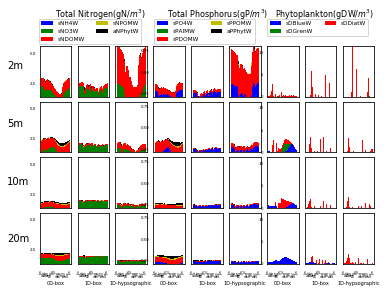

In [13]:
# Library for legends(only used here)
# draw lengend according to the upper right corner
# Variables for ploting legend
fontP = FontProperties()
fontP.set_size('xx-small')
# starting plot fig6
fig6 =plt.figure()
fig6,axs=plt.subplots(4,9,sharex=True,squeeze=True)
fig6.subplots_adjust(hspace=0.1)
#fig6,axs=plt.subplot2grid((4,9))
#j for column postion, q for ylim variable
j=0;q=0
for var in variables_comp:
    ymin=ymin_comp[q];ymax=ymax_comp[q]
    for model in models:
        i=0
        for depth in depths:
#            print depth, model, var
            k=0;Y={};bott=Series(data=0.0, index=time);P=[]
            for element in compositon[depth][model][var].columns:
#                print depth, model, var, element,j,i,k
                Y[element]=compositon[depth][model][var][element]
                bott=bott.add(Y[element])
                plot = axs[i,j].bar(time_t,Y[element],color=com_colors[k] \
                                    ,width=1.0,bottom=bott-Y[element],edgecolor ="none")
                axs[i,j].set_ylim(ymin,ymax)
                P.append(plot)
                k=k+1
            axs[i,j].xaxis_date()
            axs[i,j].xaxis.set_major_locator(mdates.MonthLocator())
            axs[i,j].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
            plt.setp( axs[i,j].xaxis.get_majorticklabels(), rotation=90 )
#  set x label for disinguish model output
            if i==3:
                axs[i,j].set_xlabel(model,fontsize=5,rotation='horizontal')
#            axs[i,j].yaxis.set_label_coords(-0.25, 0.5)
            if i ==0 and j==1:
                axs[i,j].legend(P,compositon[depth][model][var].columns,loc=1,ncol=2, \
                               bbox_to_anchor=(0, 0, 2.1,1.6),prop = fontP,fancybox=True,\
                                shadow=False)
            if i ==0 and j==4:
                axs[i,j].legend(P,compositon[depth][model][var].columns,loc=1,ncol=2, \
                               bbox_to_anchor=(0, 0, 2.1,1.6),prop = fontP,fancybox=True,\
                                shadow=False) 
            if i ==0 and j==7:
                axs[i,j].legend(P,compositon[depth][model][var].columns,loc=1,ncol=2, \
                               bbox_to_anchor=(0, 0, 2.1,1.6),prop = fontP,fancybox=True,\
                                shadow=False)
# turn off the ticks in subplots
            axs[i,j].tick_params(axis='x',which='both',top='off',bottom='off')
            axs[i,j].tick_params(axis='y',which='both',left='off',right='off')
            axs[i,j].yaxis.set_tick_params(which = 'major', direction = 'out',pad=0.01)
            for xtick in axs[i,j].xaxis.get_major_ticks():
                xtick.label.set_fontsize(3)
            for ytick in axs[i,j].yaxis.get_major_ticks():
                ytick.label.set_fontsize(4)
                if model=='1D-box' or model == '1D-hypsographic':
                    ytick.label.set_visible(False)
            i=i+1
        j=j+1
    q=q+1
# Make legend, accoring to subplot [2,3], place it on the right side of the figure
#legend = axs[0,1].legend(handles= loc=1, ncol=2,prop = fontP,fancybox=True,shadow=False)
# legend((p1, p2,p3,p4), ('sNH4W', 'sNO3W','sNDetW','sNPhytW'),loc=1,ncol=2,bbox_to_anchor=(0, 0, 1.0,1.4))
#legend.draw_frame(False)

#axs[0,1].legend(loc=1, ncol=2, bbox_to_anchor=(0, 0, 1.0,1.35),
#                         prop = fontP,fancybox=True,shadow=False)

#plt.setp(legend.get_title(),fontsize='xx-small')
fig6.text(0.16,0.98,'Total Nitrogen(gN/$m^3$)',**{'fontsize':8})
fig6.text(0.42,0.98,'Total Phosphorus(gP/$m^3$)',**{'fontsize':8})
fig6.text(0.67,0.98,'Phytoplankton(gDW/$m^3$)',**{'fontsize':8})
# Add text for depth
fig6.text(0.05,0.8,'2m',**{'fontsize':10})
fig6.text(0.05,0.6,'5m',**{'fontsize':10})
fig6.text(0.05,0.4,'10m',**{'fontsize':10})
fig6.text(0.05,0.2,'20m',**{'fontsize':10})
fig6.savefig('fig6.png',bbox_inches='tight',dpi=1200)

In [22]:
#get color range for each variable in group1
vmin_1=[];vmax_1=[]
for var in variables_group1:
    vmin_depths=[];vmax_depths=[]
    for output in outputs:
        vmin_models=[];vmax_models=[]
        for model in model_2d:
            vmin_models.append(np.min(np.min(output[model][var])))
            vmax_models.append(np.max(np.max(output[model][var])))
        vmin_depths.append(np.min(vmin_models))
        vmax_depths.append(np.max(vmax_models))
    vmin_1.append(np.min(vmin_depths))
    vmax_1.append(np.max(vmax_depths))


In [23]:
# Library for legends(only used here)
# draw lengend according to the upper right corner
# Variables for ploting legend
fontP = FontProperties()
fontP.set_size('xx-small')
# starting plot group1 variables
fig3 = plt.figure()
fig3, axs = plt.subplots(8,4,sharex=True,squeeze=True)
# add color bar postions
# add color bar, for group 1
cbposition1=[]
cbposition_1=fig3.add_axes([0.13, 0.95, 0.15,0.01])
cbposition1.append(cbposition_1)
cbposition_2=fig3.add_axes([0.33, 0.95, 0.15,0.01])
cbposition1.append(cbposition_2)
cbposition_3=fig3.add_axes([0.53, 0.95, 0.15,0.01])
cbposition1.append(cbposition_3)
cbposition_4=fig3.add_axes([0.73, 0.95, 0.15,0.01])
cbposition1.append(cbposition_4)
# j for column location
j=0
for var in variables_group1:
    vmin=vmin_1[j];vmax=vmax_1[j]
# i for row location
# k for depths index
    i=0
    k=0
    for output in outputs:
        wd=np.arange(len(output.index))+1
        extent=[time_t.min(), time_t.max(),wd.min(),wd.max()]
        for model in model_2d:
            cbmap = axs[i,j].imshow(output[model][var],extent = extent,origin ='lower',\
                                    aspect='auto',vmin=vmin, vmax=vmax)
# Set x-axis for subplots
            axs[i,j].xaxis_date()
            axs[i,j].xaxis.set_major_locator(mdates.MonthLocator())
            axs[i,j].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
# turn off the ticks in subplots
            axs[i,j].tick_params(axis='x',which='both',top='off',bottom='off')
            axs[i,j].tick_params(axis='y',which='both',left='off',right='off')
            plt.setp( axs[i,j].xaxis.get_majorticklabels(), rotation=90 )
            for xtick in axs[i,j].xaxis.get_major_ticks():
                xtick.label.set_fontsize(5)
# Set y-axis for subplots
            axs[i,j].yaxis.set_major_locator(ticker.FixedLocator([wd.min(),wd.max()]))
            axs[i,j].set_yticklabels(['0',depths[k]])
            for ytick in axs[i,j].yaxis.get_major_ticks():
                ytick.label.set_fontsize(5)
# set labels for different model output
            if j==0:
                axs[i,j].set_ylabel(model,fontsize=5,rotation=45)
                axs[i,j].yaxis.set_label_coords(-0.15, 0.3)
# plotting color bar
            if i==0:
                cb=fig3.colorbar(cbmap,cax=cbposition1[j],orientation='horizontal')
                # set color bar location
                cblocator=[];step=(vmax-vmin)/5;
                cblocator=[vmin,vmin+step,vmin+2*step,vmin+3*step,vmin+4*step,vmin+5*step]
                cb.set_ticks(cblocator)
                if j==0:
                    cb.formatter=ticker.FormatStrFormatter(('%0.1f'))
                elif j==1:
                    cb.formatter=ticker.FormatStrFormatter(('%0.1f'))
                else:
                    cb.formatter=ticker.FormatStrFormatter(('%0.2f'))
                cb.update_ticks()
                cb.ax.tick_params(labelsize=5)
            i=i+1
        k=k+1
    j=j+1
# add columns for variables
fig3.text(0.14,0.97,'Temperature($^o$C)',**{'fontsize':8})
fig3.text(0.34,0.97,'Oxygen(gO$2$/$m^3$)',**{'fontsize':8})
fig3.text(0.53,0.97,'Total Nitrogen(gN/$m^3$)',**{'fontsize':8})
fig3.text(0.732,0.97,'Total Phosphorus(gP/$m^3$)',**{'fontsize':8})
#save fig
fig3.savefig('fig3.png',bbox_inches='tight',dpi=1200)
plt.close()


In [24]:
#get color range for each variable in group1
vmin_2=[];vmax_2=[]
for var in variables_group2:
    vmin_depths=[];vmax_depths=[]
    for output in outputs:
        vmin_models=[];vmax_models=[]
        for model in model_2d:
            vmin_models.append(np.min(np.min(output[model][var])))
            vmax_models.append(np.max(np.max(output[model][var])))
        vmin_depths.append(np.min(vmin_models))
        vmax_depths.append(np.max(vmax_models))
    vmin_2.append(np.min(vmin_depths))
    vmax_2.append(np.max(vmax_depths))    

KeyError: 'aDFish'

In [91]:
# Library for legends(only used here)
# draw lengend according to the upper right corner
# Variables for ploting legend
fontP = FontProperties()
fontP.set_size('xx-small')

# Plotting variables group2
fig4 = plt.figure()
fig4, axs = plt.subplots(8,4,sharex=True,squeeze=True)
# add color bar postions
# add color bar, for group 1
cbposition2=[]
cbposition_1=fig4.add_axes([0.13, 0.95, 0.15,0.01])
cbposition2.append(cbposition_1)
cbposition_2=fig4.add_axes([0.33, 0.95, 0.15,0.01])
cbposition2.append(cbposition_2)
cbposition_3=fig4.add_axes([0.53, 0.95, 0.15,0.01])
cbposition2.append(cbposition_3)
cbposition_4=fig4.add_axes([0.73, 0.95, 0.15,0.01])
cbposition2.append(cbposition_4)
# j for column location
j=0
for var in variables_group2:
    vmin=vmin_2[j];vmax=vmax_2[j]
# i for row location
# k for depths index
    i=0;k=0
    for output in outputs:
        wd=np.arange(len(output.index))+1
        extent=[time_t.min(), time_t.max(),wd.min(),wd.max()]
        for model in model_2d:
#            print model, var
            cbmap=axs[i,j].imshow(output[model][var],extent = extent,origin ='lower',\
                                  aspect='auto',vmin=vmin, vmax=vmax)
            axs[i,j].xaxis_date()
            axs[i,j].xaxis.set_major_locator(mdates.MonthLocator())
            axs[i,j].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
            plt.setp( axs[i,j].xaxis.get_majorticklabels(), rotation=90 )
# turn off the ticks in subplots
            axs[i,j].tick_params(axis='x',which='both',top='off',bottom='off')
            axs[i,j].tick_params(axis='y',which='both',left='off',right='off')
            for xtick in axs[i,j].xaxis.get_major_ticks():
                xtick.label.set_fontsize(5)
# Set y-axis for subplots
            axs[i,j].yaxis.set_major_locator(ticker.FixedLocator([wd.min(),wd.max()]))
            axs[i,j].set_yticklabels(['0',depths[k]])
            for ytick in axs[i,j].yaxis.get_major_ticks():
                ytick.label.set_fontsize(5)
# set labels for different model output
            if j==0:
                axs[i,j].set_ylabel(model,fontsize=5,rotation=45)
                axs[i,j].yaxis.set_label_coords(-0.15, 0.3)
# plotting color bar
            if i==0:
                cb=fig4.colorbar(cbmap,cax=cbposition2[j],orientation='horizontal')
                # set color bar location
                cblocator=[];step=(vmax-vmin)/5;
                cblocator=[vmin,vmin+step,vmin+2*step,vmin+3*step,vmin+4*step,vmin+5*step]
                cb.set_ticks(cblocator)
                if j==0:
                    cb.formatter=ticker.FormatStrFormatter(('%0.1f'))
                else:
                    cb.formatter=ticker.FormatStrFormatter(('%0.2f'))
                cb.update_ticks()
                cb.ax.tick_params(labelsize=5)
            i=i+1
        k=k+1
    j=j+1
# adjust a-axis labels
# add columns for variables
fig4.text(0.17,0.97,'PAR(W/$m^2$)',**{'fontsize':8})
fig4.text(0.33,0.97,'Phytoplankton(gDW/$m^3$)',**{'fontsize':8})
fig4.text(0.53,0.97,'Zooplankton(gDW/$m^3$)',**{'fontsize':8})
fig4.text(0.75,0.97,'Fish(gDW/$m^2$)',**{'fontsize':8})
fig4.savefig('fig4.png',bbox_inches='tight',dpi=1200)
plt.close()

IndexError: list index out of range

In [28]:
ymin_3=[];ymax_3=[]
for var in variables_group3:
    ymin_depths=[];ymax_depths=[]
    for depth in depths:
        ymin_models=[];ymax_models=[]
        for model in models:
            ymin_models.append(np.min(np.min(results[depth][model][var])))
            ymax_models.append(np.max(np.max(results[depth][model][var])))
        ymin_depths.append(np.min(ymin_models))
        ymax_depths.append(np.max(ymax_models))
    ymin_3.append(np.min(ymin_depths))
    ymax_3.append(np.max(ymax_depths))
vmin_3=[];vmax_3=[]
for var in variables_group3:
    vmin_depths=[];vmax_depths=[]
    for f_lake in gotmlake:
        vmin_depths.append(np.min(np.min(df_lake[f_lake][var])))
        vmax_depths.append(np.max(np.max(df_lake[f_lake][var])))
    vmin_3.append(np.min(vmin_depths))
    vmax_3.append(np.max(vmax_depths))

In [29]:
fontP = FontProperties()
fontP.set_size(4)
# Plot line plots with three different model output
# Plot group one variables
fig5 = plt.figure()
fig5, axs = plt.subplots(4,4,sharex=True,squeeze=True, )
# adjust the space between subplots
fig5.subplots_adjust(hspace = 0.07)
#plt.subplots_adjust(hspace = .1)
cbposition3=[]
cbposition_1=fig5.add_axes([0.33, 0.95, 0.15,0.01])
cbposition3.append(cbposition_1)
cbposition_2=fig5.add_axes([0.75, 0.95, 0.15,0.01])
cbposition3.append(cbposition_2)
lakeoutput=['pclake-gotmlake-2m.nc','pclake-gotmlake-5m.nc',\
            'pclake-gotmlake-10m.nc','pclake-gotmlake-20m.nc']

j=0;q=0
for var in variables_group3:
    ymin=ymin_3[q];ymax=ymax_3[q]
    vmin=vmin_3[q];vmax=vmax_3[q]
    i=0
    for depth in depths:
        k=0
        for model in models:
            axs[i,j].plot(time_t,results[depth][model][var], color=colors[k],linestyle=lines[k],label=model)
            axs[i,j].set_ylim(ymin,ymax)
            k=k+1
# Set x-axis and y-axis ticks
        cbmap=axs[i,j+1].imshow(df_lake[lakeoutput[i]][var],extent = extent,origin ='lower',\
                                  aspect='auto',vmin=vmin, vmax=vmax)
# Set x-axis for subplots
        axs[i,j].xaxis_date()
        axs[i,j].xaxis.set_major_locator(mdates.MonthLocator())
        axs[i,j].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
        plt.setp( axs[i,j].xaxis.get_majorticklabels(), rotation=90 )
        for xtick in axs[i,j].xaxis.get_major_ticks():
            xtick.label.set_fontsize(5)
        for ytick in axs[i,j].yaxis.get_major_ticks():
            ytick.label.set_fontsize(5)
        axs[i,j+1].xaxis_date()
        axs[i,j+1].xaxis.set_major_locator(mdates.MonthLocator())
        axs[i,j+1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
        plt.setp( axs[i,j+1].xaxis.get_majorticklabels(), rotation=90 )
# turn off the ticks in subplots
        axs[i,j].tick_params(axis='x',which='both',top='off',bottom='off')
        axs[i,j].tick_params(axis='y',which='both',left='off',right='off')
        for xtick in axs[i,j+1].xaxis.get_major_ticks():
            xtick.label.set_fontsize(5)
# Set y-axis for subplots
        axs[i,j+1].yaxis.set_major_locator(ticker.FixedLocator([wd.min(),wd.max()]))
        axs[i,j+1].set_yticklabels(['0',depths[i]])
# turn off the ticks in subplots
        axs[i,j+1].tick_params(axis='x',which='both',top='off',bottom='off')
        axs[i,j+1].tick_params(axis='y',which='both',left='off',right='off')
        for ytick in axs[i,j+1].yaxis.get_major_ticks():
            ytick.label.set_fontsize(5)
# plotting color bar
        if i==0:
            cb=fig5.colorbar(cbmap,cax=cbposition3[q],orientation='horizontal')
    # set color bar location
            cblocator=[];step=(vmax-vmin)/5;
            cblocator=[vmin,vmin+step,vmin+2*step,vmin+3*step,vmin+4*step,vmin+5*step]
            cb.set_ticks(cblocator)
            cb.formatter=ticker.FormatStrFormatter(('%0.1f'))
            cb.update_ticks()
            cb.ax.tick_params(labelsize=5)
        
        i=i+1
    j=j+2
    q=q+1
# loc[x,y], y is vertial positon, y, 1 is top
# x is horizontal positon, 1 is the right
# The following is setting legends and labels for the picture
# i.e making the picture look beautiful
# Make legend, accoring to subplot [2,3], place it on the right side of the figure
legend = axs[0,0].legend(loc=1, ncol=3, bbox_to_anchor=(0.0, 0, 1.05,1.35),
                         prop = fontP,fancybox=True,shadow=False)
legend = axs[0,2].legend(loc=1, ncol=3, bbox_to_anchor=(0.0, 0, 1.05,1.35),
                         prop = fontP,fancybox=True,shadow=False)
#legend.draw_frame(False)
#plt.setp(legend.get_title(),fontsize='xx-small')
# Add text for variables
fig5.text(0.24,0.98,'Macrophytes(gDW/$m^2$)',**{'fontsize':10})
#fig3.text(0.37,0.92,'Oxygen',**{'fontsize':10})
fig5.text(0.65,0.98,'Zoobenthos(gDW/$m^2$)',**{'fontsize':10})
#fig3.text(0.73,0.92,'Total Phosphorus',**{'fontsize':10})
# Add text for depth
fig5.text(0.05,0.8,'2m',**{'fontsize':10})
fig5.text(0.05,0.6,'5m',**{'fontsize':10})
fig5.text(0.05,0.4,'10m',**{'fontsize':10})
fig5.text(0.05,0.2,'20m',**{'fontsize':10})
# Save figure, and reduce the margins
fig5.savefig('fig5.png',bbox_inches='tight',dpi=1200)

In [30]:
#get y-lim range for each variable for composition plot
# the group only for getting the y-axis spam for composition plot
comp_group= ['totN','totP','aDPhytW']
ymin_comp=[];ymax_comp=[]
for var in comp_group:
    ymin_depths=[];ymax_depths=[]
    for depth in depths:
        ymin_models=[];ymax_models=[]
        for model in models:
            ymin_models.append(np.min(np.min(results[depth][model][var])))
            ymax_models.append(np.max(np.max(results[depth][model][var])))
        ymin_depths.append(np.min(ymin_models))
        ymax_depths.append(np.max(ymax_models))
    ymin_comp.append(np.min(ymin_depths))
    ymax_comp.append(np.max(ymax_depths))

In [31]:
# Library for legends(only used here)
# draw lengend according to the upper right corner
# Variables for ploting legend
fontP = FontProperties()
fontP.set_size('xx-small')
# starting plot fig6
fig6 =plt.figure()
fig6,axs=plt.subplots(4,9,sharex=True,squeeze=True)
fig6.subplots_adjust(hspace=0.1)
#fig6,axs=plt.subplot2grid((4,9))
#j for column postion, q for ylim variable
j=0;q=0
for var in variables_comp:
    ymin=ymin_comp[q];ymax=ymax_comp[q]
    for model in models:
        i=0
        for depth in depths:
#            print depth, model, var
            k=0;Y={};bott=Series(data=0.0, index=time);P=[]
            for element in compositon[depth][model][var].columns:
#                print depth, model, var, element,j,i,k
                Y[element]=compositon[depth][model][var][element]
                bott=bott.add(Y[element])
                plot = axs[i,j].bar(time_t,Y[element],color=com_colors[k] \
                                    ,width=1.0,bottom=bott-Y[element],edgecolor ="none")
                axs[i,j].set_ylim(ymin,ymax)
                P.append(plot)
                k=k+1
            axs[i,j].xaxis_date()
            axs[i,j].xaxis.set_major_locator(mdates.MonthLocator())
            axs[i,j].xaxis.set_major_formatter(mdates.DateFormatter('%b'))
            plt.setp( axs[i,j].xaxis.get_majorticklabels(), rotation=90 )
#  set x label for disinguish model output
            if i==3:
                axs[i,j].set_xlabel(model,fontsize=5,rotation='horizontal')
#            axs[i,j].yaxis.set_label_coords(-0.25, 0.5)
            if i ==0 and j==1:
                axs[i,j].legend(P,compositon[depth][model][var].columns,loc=1,ncol=2, \
                               bbox_to_anchor=(0, 0, 1.8,1.4),prop = fontP,fancybox=True,\
                                shadow=False)
            if i ==0 and j==4:
                axs[i,j].legend(P,compositon[depth][model][var].columns,loc=1,ncol=2, \
                               bbox_to_anchor=(0, 0, 1.8,1.4),prop = fontP,fancybox=True,\
                                shadow=False) 
            if i ==0 and j==7:
                axs[i,j].legend(P,compositon[depth][model][var].columns,loc=1,ncol=2, \
                               bbox_to_anchor=(0, 0, 1.8,1.4),prop = fontP,fancybox=True,\
                                shadow=False)
# turn off the ticks in subplots
            axs[i,j].tick_params(axis='x',which='both',top='off',bottom='off')
            axs[i,j].tick_params(axis='y',which='both',left='off',right='off')
            axs[i,j].yaxis.set_tick_params(which = 'major', direction = 'out',pad=0.01)
            for xtick in axs[i,j].xaxis.get_major_ticks():
                xtick.label.set_fontsize(3)
            for ytick in axs[i,j].yaxis.get_major_ticks():
                ytick.label.set_fontsize(4)
                if model=='1D-box' or model == '1D-hypsographic':
                    ytick.label.set_visible(False)
            i=i+1
        j=j+1
    q=q+1
# Make legend, accoring to subplot [2,3], place it on the right side of the figure
#legend = axs[0,1].legend(handles= loc=1, ncol=2,prop = fontP,fancybox=True,shadow=False)
# legend((p1, p2,p3,p4), ('sNH4W', 'sNO3W','sNDetW','sNPhytW'),loc=1,ncol=2,bbox_to_anchor=(0, 0, 1.0,1.4))
#legend.draw_frame(False)

#axs[0,1].legend(loc=1, ncol=2, bbox_to_anchor=(0, 0, 1.0,1.35),
#                         prop = fontP,fancybox=True,shadow=False)

#plt.setp(legend.get_title(),fontsize='xx-small')
fig6.text(0.16,0.98,'Total Nitrogen(gN/$m^3$)',**{'fontsize':8})
fig6.text(0.42,0.98,'Total Phosphorus(gP/$m^3$)',**{'fontsize':8})
fig6.text(0.67,0.98,'Phytoplankton(gDW/$m^3$)',**{'fontsize':8})
# Add text for depth
fig6.text(0.05,0.8,'2m',**{'fontsize':10})
fig6.text(0.05,0.6,'5m',**{'fontsize':10})
fig6.text(0.05,0.4,'10m',**{'fontsize':10})
fig6.text(0.05,0.2,'20m',**{'fontsize':10})
fig6.savefig('fig6.png',bbox_inches='tight',dpi=1200)